#Multi Classification Neural Network of Hyperspectral Image

##Setting Up Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Handling

###Importing Data

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
data = loadmat('/content/drive/MyDrive/Japser_ridge/jasperRidge2_R198.mat')
Jasper_Ridge_gt = loadmat('/content/drive/MyDrive/Japser_ridge/real_data_jasperRidge.mat')

###Preparing The Data

To find the correct labels we need to use these commands

In [ ]:
print(data.keys())
print(Jasper_Ridge_gt.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Region', 'SlectBands', 'nRow', 'nCol', 'nBand', 'Y', 'maxValue'])
dict_keys(['__header__', '__version__', '__globals__', 'A_init', 'M0', 'r_cube'])


In [ ]:
import numpy as np

# X is just the hyperspectral cube

cube = data['Y'].T              # (10000, 198)
X = cube

# y is the class labels (convert one-hot to integer labels)
gt_onehot = Jasper_Ridge_gt['A_init']  # or 'r_cube' depending on true GT
print("GT onehot shape:", gt_onehot.shape)

# Convert from one-hot (4, 10000) -> (10000,)
labels = np.argmax(gt_onehot, axis=0) + 1   # class indices 1..4
print("Labels shape:", labels.shape)


# Remove unlabeled pixels (if there are any zeros)
mask = labels > 0
X_labeled = cube[mask]
y_labeled = labels[mask]

print("Final data:", X_labeled.shape, y_labeled.shape)

GT onehot shape: (4, 10000)
Labels shape: (10000,)
Final data: (10000, 198) (10000,)


###Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled)

###Feature normailzing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scaling makes all the data be in the range from [0,1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


## Making the Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score

#This is where it is no longer just forward pass

model = MLPClassifier(
    hidden_layer_sizes=(100,100,45),  # 1 hidden layer with 100 neurons
    activation='relu',          # ReLU activation
    solver='adam',              # Adam optimizer
    max_iter=500,               # Epochs
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Kappa: {kappa:.4f}")

#96.35 at 75
#96.85 at 60
#97.25 at 55
#97.35 at 50
#98.70% at 45

Accuracy: 98.70%
Kappa: 0.9815


##Confusion Matrix

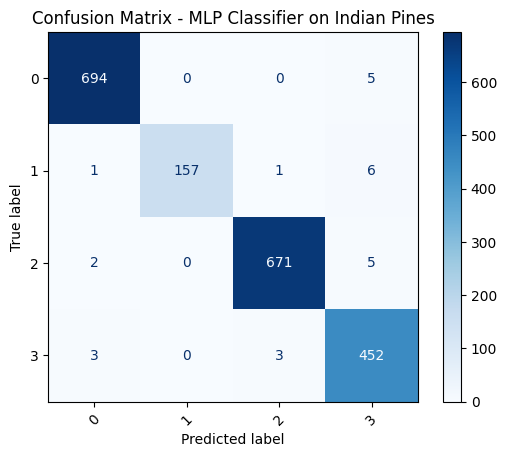

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - MLP Classifier on Indian Pines")
plt.show()